### Phase Retrieval example code

[Reference]
T. Peer, S. Welker, and T. Gerkmann, “Beyond Griffin-Lim: Improved Iterative Phase Retrieval for Speech,” in Int. Workshop on Acoustic Signal Enhancement (IWAENC), Sep. 2022.

In [1]:
from phase_retrieval import GriffinLim, RAAR, DM
import librosa
import numpy as np
import matplotlib.pyplot as plt

#### Load Signal

In [2]:

# load speech signal
sig, sr = librosa.load('./0_0_0_0_1_1_1_1.wav')

# stft/isfts parameters
stft_params = {'n_fft': 1024, 'win_length': 1024//2, 'hop_length': 1024//4}
istft_params = {'win_length': 1024//2, 'hop_length': 1024//4}

# magnitude spectrogram
M = np.abs(librosa.stft(sig, **stft_params)) 

#### Reconstruction

In [3]:
# istft
y_istft = librosa.istft(M, **istft_params)
# phase reconstructed signal
y_g =GriffinLim(M, n_iters = 10, istft_params=istft_params) ## gla
y_r =RAAR(M, n_iters = 10, istft_params=istft_params,beta = .9) ## RAAR
y_d = DM(M, istft_params = istft_params, beta = 0.8) ## dm


#### Results

In [4]:
def plot_signals(sig_org, sig_re, title = None):
    plt.plot(sig_org)
    plt.plot(sig_re, alpha = 0.7)
    plt.ylim(-.4, .4)
    plt.title(title)
    plt.legend(['original signal', 'reconstructed signal'], loc = 'lower left')
    

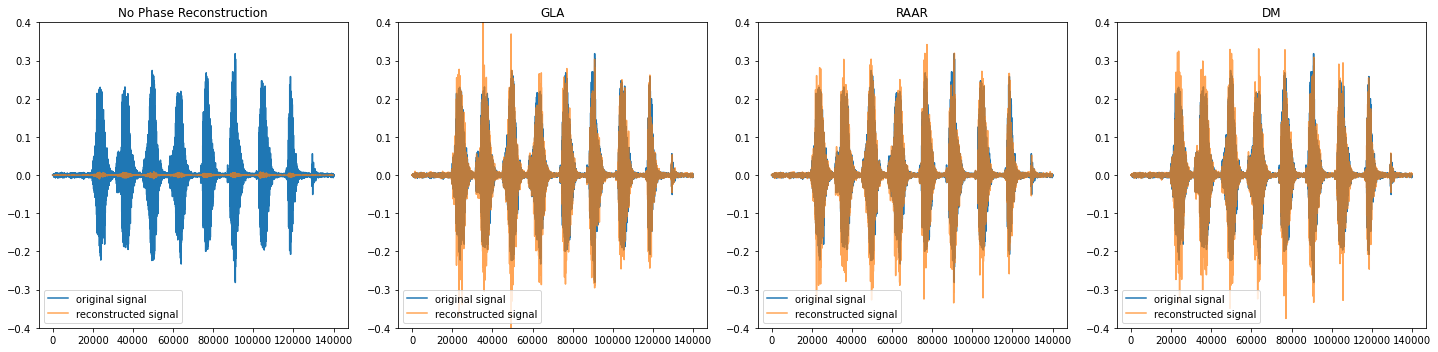

In [5]:
plt.figure(figsize = (25,5))
plt.subplot(151)
plot_signals(sig, y_istft, 'No Phase Reconstruction')

plt.subplot(152)
plot_signals(sig, y_g, 'GLA')

plt.subplot(153)
plot_signals(sig, y_r, 'RAAR')

plt.subplot(154)
plot_signals(sig, y_d, 'DM')

plt.tight_layout()
